#  Deep Learning Foundations
## Understanding Neural Networks from Scratch

---
#  Capitolo 1: Il Neurone Artificiale

##  Teoria

**Cos'è un neurone artificiale?**

Un neurone artificiale è ispirato al neurone biologico del cervello. Prende input, li combina, e produce un output.

### Analogia Biologica:

```
Neurone Biologico:
Dendriti (input) → Soma (elaborazione) → Assone (output)

Neurone Artificiale:
x₁, x₂, ..., xₙ (input) → Σ w·x + b (elaborazione) → f(z) (output)
```

### Componenti:

1. **Input (x)**: Dati in ingresso
2. **Weights (w)**: Importanza di ogni input
3. **Bias (b)**: Offset/soglia
4. **Aggregation**: Somma pesata z = Σ(wᵢ·xᵢ) + b
5. **Activation**: f(z) trasforma output

##  Matematica

**Formula completa:**
```
z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
  = Σ wᵢxᵢ + b
  = w^T·x + b  (notazione vettoriale)

output = f(z)
```

**Esempio numerico:**
```
Input: x = [2, 3]
Weights: w = [0.5, -0.3]
Bias: b = 1

z = (0.5 × 2) + (-0.3 × 3) + 1
  = 1.0 - 0.9 + 1
  = 1.1

output = f(1.1)  # dipende da activation function
```

##  Implementazione

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron:
    """
    Singolo neurone artificiale.
    
    Il neurone fa tre cose:
    1. Prende input (x)
    2. Calcola somma pesata: z = w·x + b
    3. Applica activation: output = f(z)
    """
    
    def __init__(self, num_inputs):
        """
        Inizializza neurone con pesi random.
        
        Args:
            num_inputs: Numero di input che il neurone riceve
        """
        # Inizializza pesi random (piccoli valori casuali)
        # Shape: (num_inputs,)
        self.weights = np.random.randn(num_inputs) * 0.1
        
        # Inizializza bias a zero
        self.bias = 0.0
        
        print(f"Neurone creato!")
        print(f"  Input: {num_inputs}")
        print(f"  Weights: {self.weights}")
        print(f"  Bias: {self.bias}")
    
    def forward(self, x, activation='sigmoid'):
        """
        Forward pass: calcola output dato input.
        
        Args:
            x: Input array, shape (num_inputs,)
            activation: Tipo di activation function
        
        Returns:
            output: Valore scalare
        """
        # Step 1: Calcola somma pesata
        # z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
        z = np.dot(self.weights, x) + self.bias
        
        print(f"\n  Input x: {x}")
        print(f"  Weights: {self.weights}")
        print(f"  Weighted sum z = w·x + b = {z:.4f}")
        
        # Step 2: Applica activation function
        if activation == 'sigmoid':
            # Sigmoid: σ(z) = 1 / (1 + e^(-z))
            # Output tra 0 e 1
            output = 1 / (1 + np.exp(-z))
        elif activation == 'relu':
            # ReLU: max(0, z)
            # Output = z se z > 0, altrimenti 0
            output = max(0, z)
        elif activation == 'tanh':
            # Tanh: (e^z - e^(-z)) / (e^z + e^(-z))
            # Output tra -1 e 1
            output = np.tanh(z)
        else:  # linear
            # Nessuna activation (identità)
            output = z
        
        print(f"  Activation: {activation}")
        print(f"  Output: {output:.4f}")
        
        return output


#  Esempio: Creiamo e testiamo un neurone
print("=" * 60)
print("ESEMPIO: SINGOLO NEURONE")
print("=" * 60)

# Crea neurone con 3 input
neuron = Neuron(num_inputs=3)

# Test input
test_input = np.array([1.0, 2.0, 3.0])

print(f"\n--- Test con Sigmoid ---")
output_sigmoid = neuron.forward(test_input, activation='sigmoid')

print(f"\n--- Test con ReLU ---")
output_relu = neuron.forward(test_input, activation='relu')

print(f"\n--- Test con Tanh ---")
output_tanh = neuron.forward(test_input, activation='tanh')

print(f"\n Il neurone funziona!")

ESEMPIO: SINGOLO NEURONE
Neurone creato!
  Input: 3
  Weights: [ 0.00593647 -0.03491544  0.09868344]
  Bias: 0.0

--- Test con Sigmoid ---

  Input x: [1. 2. 3.]
  Weights: [ 0.00593647 -0.03491544  0.09868344]
  Weighted sum z = w·x + b = 0.2322
  Activation: sigmoid
  Output: 0.5578

--- Test con ReLU ---

  Input x: [1. 2. 3.]
  Weights: [ 0.00593647 -0.03491544  0.09868344]
  Weighted sum z = w·x + b = 0.2322
  Activation: relu
  Output: 0.2322

--- Test con Tanh ---

  Input x: [1. 2. 3.]
  Weights: [ 0.00593647 -0.03491544  0.09868344]
  Weighted sum z = w·x + b = 0.2322
  Activation: tanh
  Output: 0.2281

 Il neurone funziona!


---
#  Capitolo 2: Activation Functions

##  Teoria

**Perché abbiamo bisogno di activation functions?**

Senza activation functions, una rete neurale sarebbe solo una serie di trasformazioni lineari. Non importa quanti layer impili, il risultato sarebbe sempre lineare!

**Problema:**
```
y = W₃(W₂(W₁x))  # senza activation
  = (W₃W₂W₁)x     # può essere ridotto a singola matrice!
  = Wx            # equivalente a un solo layer!
```

**Soluzione:**
```
y = f₃(W₃f₂(W₂f₁(W₁x)))  # con activation
# NON può essere semplificato!
# Ogni f aggiunge non-linearità
```

##  Le Principali Activation Functions

### 1. **Sigmoid** σ(z) = 1/(1+e^(-z))
- Output: (0, 1)
- Uso: Binary classification, gates (LSTM)
- Pro: Smooth, interpretabile come probabilità
- Contro: Vanishing gradient per |z| grandi

### 2. **Tanh** tanh(z) = (e^z - e^(-z))/(e^z + e^(-z))
- Output: (-1, 1)
- Uso: Hidden layers (RNN)
- Pro: Zero-centered (meglio di sigmoid)
- Contro: Vanishing gradient

### 3. **ReLU** ReLU(z) = max(0, z)
- Output: [0, ∞)
- Uso: Hidden layers (CNN, Transformer)
- Pro: No vanishing gradient, computazione veloce
- Contro: "Dying ReLU" (neuroni morti)

### 4. **GELU** (Gaussian Error Linear Unit)
- Output: Smooth version of ReLU
- Uso: GPT, BERT (Transformers moderni)
- Pro: Smooth, performance migliori
- Formula: GELU(z) ≈ z·Φ(z) dove Φ è CDF normale

##  Implementazione e Visualizzazione

VISUALIZZAZIONE ACTIVATION FUNCTIONS


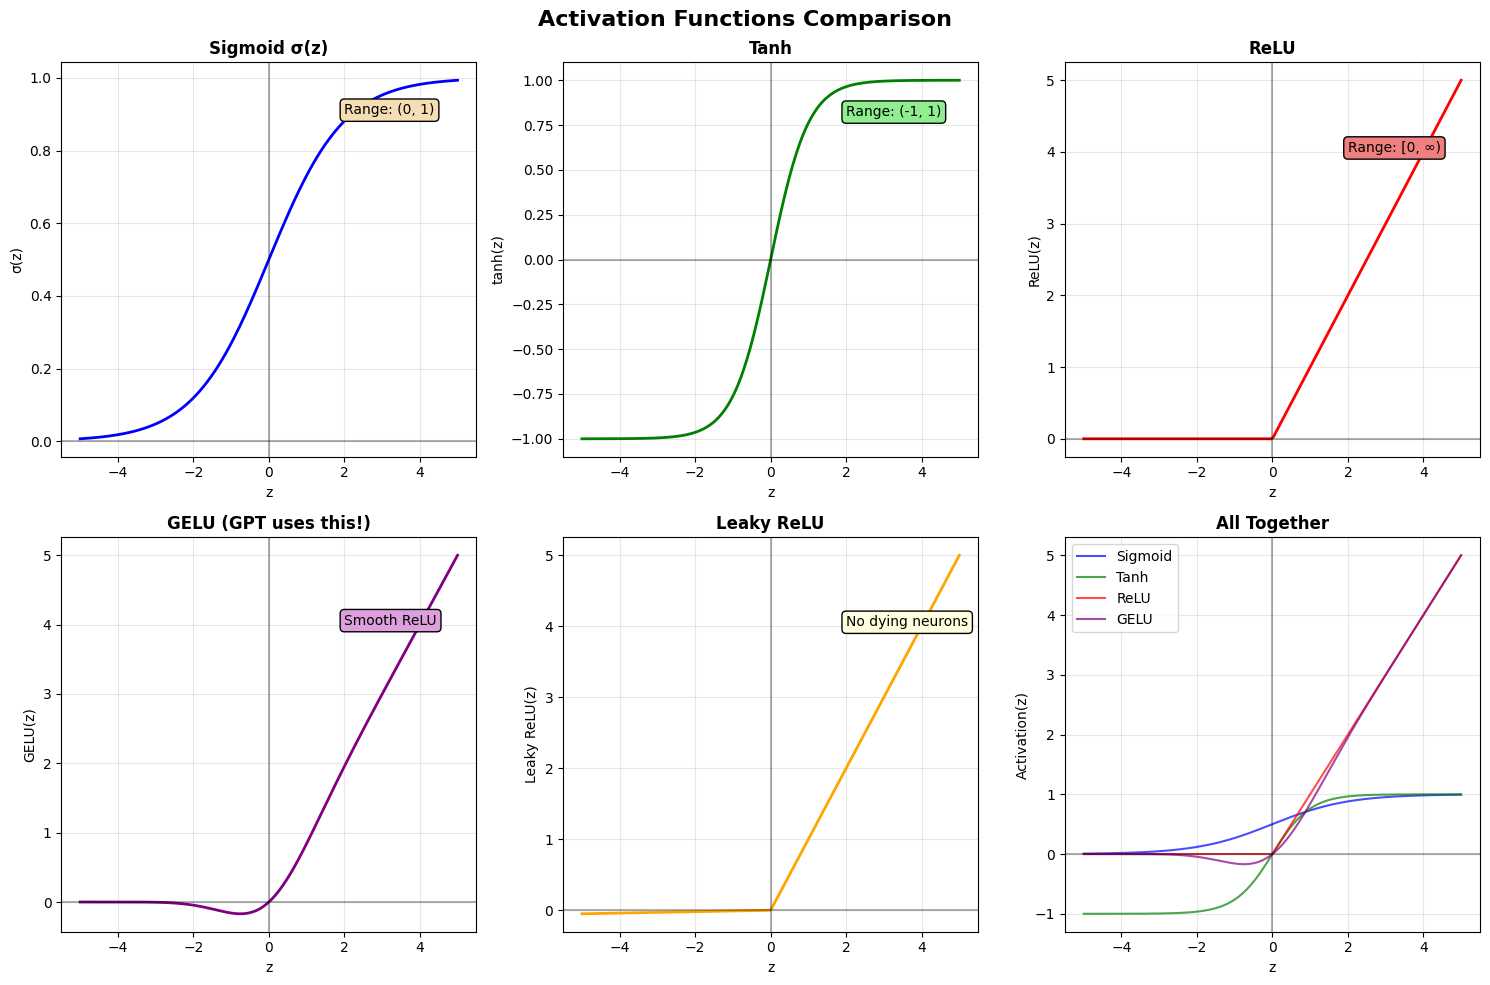


 Activation functions visualized!

Key insights:
  • Sigmoid: Good for probabilities (0-1)
  • Tanh: Zero-centered, better than sigmoid
  • ReLU: Most popular, fast computation
  • GELU: Used in GPT/BERT, smooth + performant


In [5]:
def sigmoid(z):
    """Sigmoid activation: σ(z) = 1/(1+e^(-z))"""
    return 1 / (1 + np.exp(-z))

def tanh(z):
    """Tanh activation: (e^z - e^(-z))/(e^z + e^(-z))"""
    return np.tanh(z)

def relu(z):
    """ReLU activation: max(0, z)"""
    return np.maximum(0, z)

def gelu(z):
    """
    GELU activation (approssimazione).
    GELU(z) ≈ 0.5 * z * (1 + tanh(√(2/π) * (z + 0.044715 * z³)))
    """
    return 0.5 * z * (1 + np.tanh(np.sqrt(2/np.pi) * (z + 0.044715 * z**3)))

def leaky_relu(z, alpha=0.01):
    """Leaky ReLU: max(αz, z)"""
    return np.where(z > 0, z, alpha * z)


# Visualizza tutte le activation functions
print("=" * 60)
print("VISUALIZZAZIONE ACTIVATION FUNCTIONS")
print("=" * 60)

# Range di valori
z = np.linspace(-5, 5, 200)

# Calcola output per ogni activation
sigmoid_out = sigmoid(z)
tanh_out = tanh(z)
relu_out = relu(z)
gelu_out = gelu(z)
leaky_relu_out = leaky_relu(z)

# Plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Activation Functions Comparison', fontsize=16, fontweight='bold')

# Sigmoid
axes[0, 0].plot(z, sigmoid_out, 'b-', linewidth=2)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_title('Sigmoid σ(z)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('z')
axes[0, 0].set_ylabel('σ(z)')
axes[0, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0, 0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0, 0].text(2, 0.9, 'Range: (0, 1)', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat'))

# Tanh
axes[0, 1].plot(z, tanh_out, 'g-', linewidth=2)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_title('Tanh', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('tanh(z)')
axes[0, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0, 1].text(2, 0.8, 'Range: (-1, 1)', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen'))

# ReLU
axes[0, 2].plot(z, relu_out, 'r-', linewidth=2)
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_title('ReLU', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('z')
axes[0, 2].set_ylabel('ReLU(z)')
axes[0, 2].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0, 2].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0, 2].text(2, 4, 'Range: [0, ∞)', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral'))

# GELU
axes[1, 0].plot(z, gelu_out, 'purple', linewidth=2)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_title('GELU (GPT uses this!)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('z')
axes[1, 0].set_ylabel('GELU(z)')
axes[1, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1, 0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1, 0].text(2, 4, 'Smooth ReLU', fontsize=10, bbox=dict(boxstyle='round', facecolor='plum'))

# Leaky ReLU
axes[1, 1].plot(z, leaky_relu_out, 'orange', linewidth=2)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_title('Leaky ReLU', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('z')
axes[1, 1].set_ylabel('Leaky ReLU(z)')
axes[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1, 1].text(2, 4, 'No dying neurons', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow'))

# Comparison
axes[1, 2].plot(z, sigmoid_out, 'b-', label='Sigmoid', alpha=0.7)
axes[1, 2].plot(z, tanh_out, 'g-', label='Tanh', alpha=0.7)
axes[1, 2].plot(z, relu_out, 'r-', label='ReLU', alpha=0.7)
axes[1, 2].plot(z, gelu_out, 'purple', label='GELU', alpha=0.7)
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].set_title('All Together', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('z')
axes[1, 2].set_ylabel('Activation(z)')
axes[1, 2].legend(loc='upper left')
axes[1, 2].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1, 2].axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Activation functions visualized!")
print("\nKey insights:")
print("  • Sigmoid: Good for probabilities (0-1)")
print("  • Tanh: Zero-centered, better than sigmoid")
print("  • ReLU: Most popular, fast computation")
print("  • GELU: Used in GPT/BERT, smooth + performant")

---
#  Capitolo 3: Forward Propagation

##  Teoria

**Cos'è la Forward Propagation?**

È il processo di far fluire i dati attraverso la rete dall'input all'output.

### Singolo Layer:

```
Input → [Weights·Input + Bias] → Activation → Output
  x   →      z = W·x + b       →   a = f(z)  →   a
```

### Multi-Layer Network:

```
x → Layer 1 → a₁ → Layer 2 → a₂ → ... → Layer N → output

Dove ogni layer fa:
aₗ = f(Wₗ·aₗ₋₁ + bₗ)
```

### Esempio Concreto (3-layer network):

```
Input layer (2 neurons):  x = [x₁, x₂]
Hidden layer 1 (3 neurons): a₁ = sigmoid(W₁·x + b₁)
Hidden layer 2 (3 neurons): a₂ = relu(W₂·a₁ + b₂)
Output layer (1 neuron):   y = sigmoid(W₃·a₂ + b₃)
```

##  Matematica Dettagliata

**Per ogni layer l:**

1. **Linear transformation:**
   ```
   zₗ = Wₗ·aₗ₋₁ + bₗ
   ```

2. **Activation:**
   ```
   aₗ = f(zₗ)
   ```

3. **Dimensioni:**
   ```
   Se aₗ₋₁ ha shape (nₗ₋₁,) e aₗ ha shape (nₗ,):
   - Wₗ ha shape (nₗ, nₗ₋₁)
   - bₗ ha shape (nₗ,)
   ```

##  Implementazione

In [6]:
class NeuralNetwork:
    """
    Rete neurale feedforward con multiple layers.
    
    Architettura:
    Input → Hidden 1 → Hidden 2 → ... → Output
    """
    
    def __init__(self, layer_sizes):
        """
        Inizializza rete con layer di dimensioni specificate.
        
        Args:
            layer_sizes: Lista di dimensioni [input, hidden1, hidden2, ..., output]
                        Es: [2, 4, 3, 1] = 2 input, 4 hidden, 3 hidden, 1 output
        """
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes) - 1
        
        # Inizializza weights e biases per ogni layer
        self.weights = []
        self.biases = []
        
        for i in range(self.num_layers):
            # Input size del layer corrente
            n_in = layer_sizes[i]
            # Output size del layer corrente
            n_out = layer_sizes[i + 1]
            
            # Inizializza weight matrix: (n_out, n_in)
            # Usa Xavier initialization: std = sqrt(2 / (n_in + n_out))
            W = np.random.randn(n_out, n_in) * np.sqrt(2.0 / (n_in + n_out))
            
            # Inizializza bias: (n_out,)
            b = np.zeros(n_out)
            
            self.weights.append(W)
            self.biases.append(b)
        
        print(f"Neural Network creata!")
        print(f"  Architecture: {layer_sizes}")
        print(f"  Num layers: {self.num_layers}")
        print(f"  Total parameters: {self._count_parameters()}")
    
    def _count_parameters(self):
        """Conta parametri totali (weights + biases)."""
        total = 0
        for W, b in zip(self.weights, self.biases):
            total += W.size + b.size
        return total
    
    def forward(self, x, verbose=False):
        """
        Forward propagation attraverso tutta la rete.
        
        Args:
            x: Input array, shape (input_size,)
            verbose: Se True, stampa dettagli di ogni layer
        
        Returns:
            output: Output finale della rete
            activations: Lista di attivazioni per ogni layer (per backprop)
        """
        # Salva attivazioni per ogni layer (serve per backprop)
        activations = [x]  # a₀ = x (input)
        a = x
        
        if verbose:
            print(f"\n{'='*60}")
            print("FORWARD PROPAGATION")
            print(f"{'='*60}")
            print(f"\nInput: {x}")
            print(f"  Shape: {x.shape}")
        
        # Attraversa ogni layer
        for i, (W, b) in enumerate(zip(self.weights, self.biases)):
            # Linear transformation: z = W·a + b
            z = np.dot(W, a) + b
            
            # Activation function (usa ReLU per hidden, sigmoid per output)
            if i < self.num_layers - 1:  # Hidden layers
                a = relu(z)
                activation_name = "ReLU"
            else:  # Output layer
                a = sigmoid(z)
                activation_name = "Sigmoid"
            
            activations.append(a)
            
            if verbose:
                print(f"\n--- Layer {i+1} ---")
                print(f"  W shape: {W.shape}")
                print(f"  b shape: {b.shape}")
                print(f"  z = W·a + b:")
                print(f"    Shape: {z.shape}")
                print(f"    Values: {z}")
                print(f"  Activation: {activation_name}")
                print(f"  a = f(z):")
                print(f"    Shape: {a.shape}")
                print(f"    Values: {a}")
        
        if verbose:
            print(f"\n{'='*60}")
            print(f"Final Output: {a}")
            print(f"{'='*60}")
        
        return a, activations


#  Esempio: Crea e testa una rete neurale
print("=" * 60)
print("ESEMPIO: NEURAL NETWORK FORWARD PASS")
print("=" * 60)

# Architettura: 2 input → 4 hidden → 3 hidden → 1 output
nn = NeuralNetwork(layer_sizes=[2, 4, 3, 1])

# Test input
test_input = np.array([0.5, -0.3])

print(f"\nTest input: {test_input}")

# Forward pass (verbose per vedere ogni step)
output, activations = nn.forward(test_input, verbose=True)

print(f"\n Forward propagation completata!")
print(f"\nSummary:")
print(f"  Input: {test_input}")
print(f"  Output: {output[0]:.6f}")
print(f"  Num activations saved: {len(activations)}")

ESEMPIO: NEURAL NETWORK FORWARD PASS
Neural Network creata!
  Architecture: [2, 4, 3, 1]
  Num layers: 3
  Total parameters: 31

Test input: [ 0.5 -0.3]

FORWARD PROPAGATION

Input: [ 0.5 -0.3]
  Shape: (2,)

--- Layer 1 ---
  W shape: (4, 2)
  b shape: (4,)
  z = W·a + b:
    Shape: (4,)
    Values: [-0.65521342  0.40661416 -0.11104756  0.24743341]
  Activation: ReLU
  a = f(z):
    Shape: (4,)
    Values: [0.         0.40661416 0.         0.24743341]

--- Layer 2 ---
  W shape: (3, 4)
  b shape: (3,)
  z = W·a + b:
    Shape: (3,)
    Values: [ 0.37308481 -0.2494578   0.36490525]
  Activation: ReLU
  a = f(z):
    Shape: (3,)
    Values: [0.37308481 0.         0.36490525]

--- Layer 3 ---
  W shape: (1, 3)
  b shape: (1,)
  z = W·a + b:
    Shape: (1,)
    Values: [0.12533506]
  Activation: Sigmoid
  a = f(z):
    Shape: (1,)
    Values: [0.53129281]

Final Output: [0.53129281]

 Forward propagation completata!

Summary:
  Input: [ 0.5 -0.3]
  Output: 0.531293
  Num activations saved

---
#  Capitolo 4: Loss Functions

##  Teoria

**Cos'è una Loss Function?**

La loss function misura quanto il nostro modello è "sbagliato". Più bassa la loss, migliore il modello!

```
Loss = Quanto sei lontano dalla risposta corretta
```

### Tipi di Loss Functions:

##  Le Principali Loss Functions

### 1. **Mean Squared Error (MSE)** - Regressione
```
MSE = (1/n) Σ(yᵢ - ŷᵢ)²

Esempio:
y_true = [1, 2, 3]
y_pred = [1.1, 2.2, 2.8]
MSE = ((1-1.1)² + (2-2.2)² + (3-2.8)²) / 3
    = (0.01 + 0.04 + 0.04) / 3
    = 0.03
```

**Uso:** Predire valori continui (prezzi case, temperature)

### 2. **Binary Cross-Entropy** - Classificazione Binaria
```
BCE = -[y·log(ŷ) + (1-y)·log(1-ŷ)]

Esempio:
y_true = 1 (spam)
y_pred = 0.8 (80% sicuro che è spam)
BCE = -(1·log(0.8) + 0·log(0.2))
    = -log(0.8)
    = 0.223
```

**Uso:** Spam/Ham, Gatto/Cane, Sì/No

### 3. **Categorical Cross-Entropy** - Multi-class
```
CCE = -Σ yᵢ·log(ŷᵢ)

Esempio:
y_true = [0, 1, 0]  (classe 2 di 3)
y_pred = [0.1, 0.7, 0.2]
CCE = -(0·log(0.1) + 1·log(0.7) + 0·log(0.2))
    = -log(0.7)
    = 0.357
```

**Uso:** GPT next-token prediction! MNIST digit classification

##  Implementazione

In [7]:
def mean_squared_error(y_true, y_pred):
    """
    Mean Squared Error per regressione.
    
    Formula: MSE = (1/n) Σ(y_true - y_pred)²
    """
    return np.mean((y_true - y_pred) ** 2)

def binary_cross_entropy(y_true, y_pred, epsilon=1e-15):
    """
    Binary Cross-Entropy per classificazione binaria.
    
    Formula: BCE = -[y·log(ŷ) + (1-y)·log(1-ŷ)]
    
    Args:
        y_true: Veri label (0 o 1)
        y_pred: Predizioni (tra 0 e 1)
        epsilon: Piccola costante per evitare log(0)
    """
    # Clip predictions per evitare log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def categorical_cross_entropy(y_true, y_pred, epsilon=1e-15):
    """
    Categorical Cross-Entropy per multi-class classification.
    
    Formula: CCE = -Σ y_true · log(y_pred)
    
    Questa è la loss usata in GPT per next-token prediction!
    """
    # Clip per evitare log(0)
    y_pred = np.clip(y_pred, epsilon, 1)
    return -np.sum(y_true * np.log(y_pred))


#  Esempio: Calcola diverse loss functions
print("=" * 60)
print("LOSS FUNCTIONS EXAMPLES")
print("=" * 60)

# MSE Example (Regressione)
print("\n1. MEAN SQUARED ERROR (Regressione)")
print("-" * 60)
y_true_reg = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_pred_reg = np.array([1.1, 2.2, 2.8, 4.1, 4.9])

mse = mean_squared_error(y_true_reg, y_pred_reg)
print(f"True values:     {y_true_reg}")
print(f"Predictions:     {y_pred_reg}")
print(f"MSE Loss:        {mse:.4f}")
print(f"RMSE (sqrt):     {np.sqrt(mse):.4f}")

# Binary Cross-Entropy Example
print("\n2. BINARY CROSS-ENTROPY (Spam Detection)")
print("-" * 60)
y_true_bin = np.array([1, 0, 1, 1, 0])  # 1=spam, 0=ham
y_pred_bin = np.array([0.9, 0.1, 0.8, 0.7, 0.2])  # Probabilità

bce = binary_cross_entropy(y_true_bin, y_pred_bin)
print(f"True labels:     {y_true_bin}")
print(f"Predictions:     {y_pred_bin}")
print(f"BCE Loss:        {bce:.4f}")

# Esempio dettagliato
for i in range(len(y_true_bin)):
    loss_i = binary_cross_entropy(y_true_bin[i], y_pred_bin[i])
    correct = "✓" if (y_pred_bin[i] > 0.5) == y_true_bin[i] else "✗"
    print(f"  Sample {i+1}: true={y_true_bin[i]}, pred={y_pred_bin[i]:.2f} → loss={loss_i:.4f} {correct}")

# Categorical Cross-Entropy Example (GPT-style!)
print("\n3. CATEGORICAL CROSS-ENTROPY (Next-Token Prediction)")
print("-" * 60)
print("Scenario: GPT predice prossimo token, vocab size = 5")
print()

# True: token 2 è quello corretto
y_true_cat = np.array([0, 0, 1, 0, 0])  # One-hot encoding

# Predicted probabilities (dopo softmax)
y_pred_good = np.array([0.05, 0.05, 0.80, 0.05, 0.05])  # Good prediction!
y_pred_bad = np.array([0.30, 0.30, 0.10, 0.20, 0.10])   # Bad prediction!

cce_good = categorical_cross_entropy(y_true_cat, y_pred_good)
cce_bad = categorical_cross_entropy(y_true_cat, y_pred_bad)

print(f"True token (one-hot): {y_true_cat}")
print(f"\nGood prediction:      {y_pred_good}")
print(f"  CCE Loss: {cce_good:.4f} ✓ LOW is GOOD!")
print(f"\nBad prediction:       {y_pred_bad}")
print(f"  CCE Loss: {cce_bad:.4f} ✗ HIGH is BAD!")

# Perplexity (usato in GPT)
perplexity_good = np.exp(cce_good)
perplexity_bad = np.exp(cce_bad)
print(f"\nPerplexity (exp(loss)):")
print(f"  Good: {perplexity_good:.4f}")
print(f"  Bad: {perplexity_bad:.4f}")
print(f"  (Lower perplexity = better model)")

LOSS FUNCTIONS EXAMPLES

1. MEAN SQUARED ERROR (Regressione)
------------------------------------------------------------
True values:     [1. 2. 3. 4. 5.]
Predictions:     [1.1 2.2 2.8 4.1 4.9]
MSE Loss:        0.0220
RMSE (sqrt):     0.1483

2. BINARY CROSS-ENTROPY (Spam Detection)
------------------------------------------------------------
True labels:     [1 0 1 1 0]
Predictions:     [0.9 0.1 0.8 0.7 0.2]
BCE Loss:        0.2027
  Sample 1: true=1, pred=0.90 → loss=0.1054 ✓
  Sample 2: true=0, pred=0.10 → loss=0.1054 ✓
  Sample 3: true=1, pred=0.80 → loss=0.2231 ✓
  Sample 4: true=1, pred=0.70 → loss=0.3567 ✓
  Sample 5: true=0, pred=0.20 → loss=0.2231 ✓

3. CATEGORICAL CROSS-ENTROPY (Next-Token Prediction)
------------------------------------------------------------
Scenario: GPT predice prossimo token, vocab size = 5

True token (one-hot): [0 0 1 0 0]

Good prediction:      [0.05 0.05 0.8  0.05 0.05]
  CCE Loss: 0.2231 ✓ LOW is GOOD!

Bad prediction:       [0.3 0.3 0.1 0.2 0.1]


---
# Capitolo 5: Backpropagation

##  Teoria

**Cos'è la Backpropagation?**

È l'algoritmo che calcola i **gradienti** - quanto ogni peso contribuisce all'errore.

### Il Problema:
```
Abbiamo la loss L, vogliamo sapere:
"Se cambio il peso w₁, di quanto cambia L?"

Risposta matematica: ∂L/∂w₁ (gradiente parziale)
```

### Intuizione:

```
Forward:  x → w₁ → z₁ → a₁ → ... → L
Backward: x ← ∂L/∂w₁ ← ∂L/∂z₁ ← ∂L/∂a₁ ← ... ← L
```

Backprop usa la **Chain Rule** per propagare gradienti indietro!

## Matematica: Chain Rule

**Chain Rule base:**
```
Se f(g(x)), allora:
df/dx = (df/dg) · (dg/dx)
```

**Applicata alle reti:**
```
L = loss(y_pred, y_true)
y_pred = f(W₂ · a₁ + b₂)
a₁ = f(W₁ · x + b₁)

∂L/∂W₁ = (∂L/∂y_pred) · (∂y_pred/∂a₁) · (∂a₁/∂W₁)
         └─────────────────┬──────────────────┘
              Chain Rule in azione!
```

### Esempio Concreto (1 neurone):

```
z = w·x + b
a = σ(z)  (sigmoid)
L = (y - a)²  (MSE)

Vogliamo: ∂L/∂w

Step 1: ∂L/∂a = 2(a - y)
Step 2: ∂a/∂z = σ'(z) = σ(z)·(1-σ(z)) = a·(1-a)
Step 3: ∂z/∂w = x

Chain Rule:
∂L/∂w = (∂L/∂a) · (∂a/∂z) · (∂z/∂w)
      = 2(a-y) · a·(1-a) · x
```

##  Implementazione

In [8]:
def sigmoid_derivative(z):
    """
    Derivata di sigmoid: σ'(z) = σ(z)·(1-σ(z))
    """
    s = sigmoid(z)
    return s * (1 - s)

def relu_derivative(z):
    """
    Derivata di ReLU: 1 se z>0, altrimenti 0
    """
    return (z > 0).astype(float)


class NeuralNetworkWithBackprop(NeuralNetwork):
    """
    Estende NeuralNetwork con backpropagation.
    """
    
    def backward(self, y_true, activations, verbose=False):
        """
        Backpropagation: calcola gradienti per tutti i pesi.
        
        Args:
            y_true: True labels
            activations: Lista di attivazioni da forward pass
        
        Returns:
            gradients_W: Lista di gradienti per weights
            gradients_b: Lista di gradienti per biases
        """
        m = 1  # batch size (per ora 1 sample)
        
        # Inizializza liste per gradienti
        gradients_W = [None] * self.num_layers
        gradients_b = [None] * self.num_layers
        
        # Inizia dall'output
        y_pred = activations[-1]
        
        if verbose:
            print(f"\n{'='*60}")
            print("BACKPROPAGATION")
            print(f"{'='*60}")
            print(f"\nOutput layer:")
            print(f"  y_true: {y_true}")
            print(f"  y_pred: {y_pred}")
        
        # Gradient dell'output (per MSE loss)
        # ∂L/∂a = 2(a - y) / m
        delta = (y_pred - y_true) / m
        
        if verbose:
            print(f"  Initial delta (∂L/∂a): {delta}")
        
        # Backprop attraverso ogni layer (dal fondo all'inizio)
        for layer in range(self.num_layers - 1, -1, -1):
            # Attivazione del layer precedente
            a_prev = activations[layer]
            
            # Gradients per questo layer
            # ∂L/∂W = delta · a_prev^T
            gradients_W[layer] = np.outer(delta, a_prev)
            # ∂L/∂b = delta
            gradients_b[layer] = delta
            
            if verbose:
                print(f"\n--- Layer {layer+1} Gradients ---")
                print(f"  ∂L/∂W shape: {gradients_W[layer].shape}")
                print(f"  ∂L/∂W:\n{gradients_W[layer]}")
                print(f"  ∂L/∂b: {gradients_b[layer]}")
            
            # Se non siamo all'input layer, propaga delta indietro
            if layer > 0:
                # ∂L/∂a_prev = W^T · delta
                delta = np.dot(self.weights[layer].T, delta)
                
                # Moltiplica per derivata dell'activation
                # (ReLU per hidden layers)
                # Ricostruisci z del layer precedente
                z_prev = np.dot(self.weights[layer-1], activations[layer-1]) + self.biases[layer-1]
                delta = delta * relu_derivative(z_prev)
                
                if verbose:
                    print(f"  Delta propagated back: {delta}")
        
        if verbose:
            print(f"\n{'='*60}")
            print("Backpropagation completata!")
            print(f"{'='*60}")
        
        return gradients_W, gradients_b


#  Esempio: Forward + Backward pass
print("=" * 60)
print("BACKPROPAGATION EXAMPLE")
print("=" * 60)

# Crea rete
nn_backprop = NeuralNetworkWithBackprop(layer_sizes=[2, 3, 1])

# Input e target
x = np.array([1.0, 0.5])
y_true = np.array([1.0])  # Target output

print(f"\nInput: {x}")
print(f"Target: {y_true}")

# Forward pass
y_pred, activations = nn_backprop.forward(x, verbose=False)

print(f"\nPrediction: {y_pred}")
print(f"Error: {np.abs(y_pred - y_true)[0]:.4f}")

# Backward pass
grad_W, grad_b = nn_backprop.backward(y_true, activations, verbose=True)

print(f"\n Gradienti calcolati per tutti i pesi!")

BACKPROPAGATION EXAMPLE
Neural Network creata!
  Architecture: [2, 3, 1]
  Num layers: 2
  Total parameters: 13

Input: [1.  0.5]
Target: [1.]

Prediction: [0.5]
Error: 0.5000

BACKPROPAGATION

Output layer:
  y_true: [1.]
  y_pred: [0.5]
  Initial delta (∂L/∂a): [-0.5]

--- Layer 2 Gradients ---
  ∂L/∂W shape: (1, 3)
  ∂L/∂W:
[[-0. -0. -0.]]
  ∂L/∂b: [-0.5]
  Delta propagated back: [ 0. -0.  0.]

--- Layer 1 Gradients ---
  ∂L/∂W shape: (3, 2)
  ∂L/∂W:
[[ 0.  0.]
 [-0. -0.]
 [ 0.  0.]]
  ∂L/∂b: [ 0. -0.  0.]

Backpropagation completata!

 Gradienti calcolati per tutti i pesi!


---
#  Capitolo 6: Gradient Descent

##  Teoria

**Cos'è il Gradient Descent?**

Algoritmo per **minimizzare la loss** aggiornando i pesi nella direzione opposta al gradiente.

### Intuizione:

Immagina di essere su una montagna nella nebbia:
- **Loss** = Altitudine (vuoi scendere!)
- **Gradient** = Direzione della pendenza più ripida
- **Gradient Descent** = Fai piccoli passi nella direzione opposta

```
Se il gradiente dice "la loss aumenta andando →"
Tu vai ← per diminuire la loss!
```

##  Matematica

**Update Rule:**
```
w_new = w_old - α · ∂L/∂w

Dove:
- α (alpha) = learning rate (dimensione dello step)
- ∂L/∂w = gradiente (direzione)
```

**Esempio numerico:**
```
w = 2.0            (peso attuale)
∂L/∂w = 0.5        (gradiente positivo → loss aumenta se w aumenta)
α = 0.1            (learning rate)

w_new = 2.0 - 0.1 × 0.5
      = 2.0 - 0.05
      = 1.95          (peso diminuisce!)
```

### Varianti di Gradient Descent:

1. **Batch GD**: Usa tutto il dataset
2. **Stochastic GD (SGD)**: Usa 1 sample alla volta
3. **Mini-batch GD**: Usa piccoli batch (più usato!)

### Optimizer Moderni:

1. **SGD with Momentum**: Accelera in direzioni consistenti
2. **Adam** (GPT usa questo!): Adaptive learning rate
3. **AdamW**: Adam + weight decay

##  Implementazione

EXAMPLE: TRAINING ON XOR PROBLEM

XOR Truth Table:
Input  | Output
-------|-------
[0 0]  |   0
[0 1]  |   1
[1 0]  |   1
[1 1]  |   0
Neural Network creata!
  Architecture: [2, 4, 1]
  Num layers: 2
  Total parameters: 17

TRAINING STARTED
Learning rate: 0.5
Epochs: 1000
Training samples: 4
Epoch   0/1000: Loss = 0.334869
Epoch 100/1000: Loss = 0.000530
Epoch 200/1000: Loss = 0.000074
Epoch 300/1000: Loss = 0.000027
Epoch 400/1000: Loss = 0.000014
Epoch 500/1000: Loss = 0.000008
Epoch 600/1000: Loss = 0.000006
Epoch 700/1000: Loss = 0.000004
Epoch 800/1000: Loss = 0.000003
Epoch 900/1000: Loss = 0.000002
Epoch 999/1000: Loss = 0.000002

TRAINING COMPLETED
Final loss: 0.000002
Loss reduction: 100.00%

TESTING TRAINED NETWORK

Predictions after training:
Input  | Target | Prediction | Error
-------|--------|------------|------
[0 0]  |   0    |   0.0004    | 0.0004 ✓
[0 1]  |   1    |   0.9998    | 0.0002 ✓
[1 0]  |   1    |   0.9974    | 0.0026 ✓
[1 1]  |   0    |   0.0003    | 0.0003 

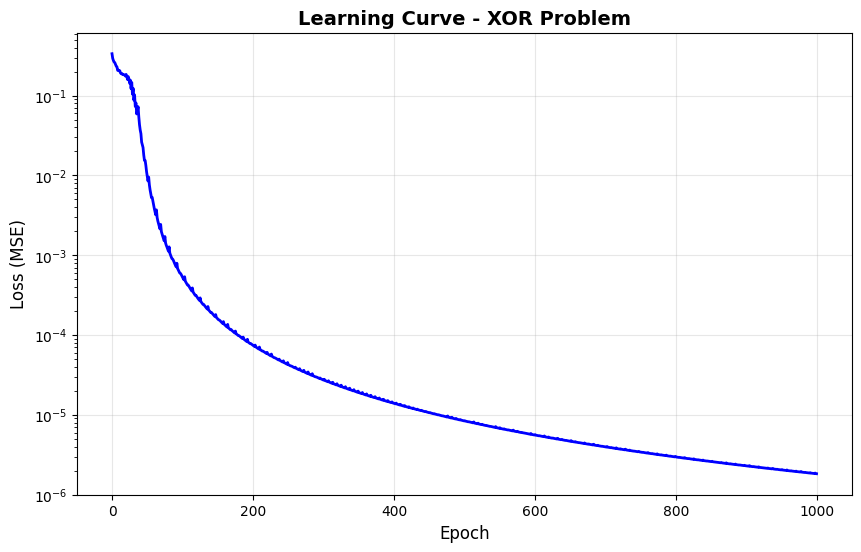


 Network learned XOR successfully!


In [ ]:
def train_network(nn, X_train, y_train, learning_rate=0.01, epochs=100, verbose_freq=10):
    """
    Training loop completo con gradient descent.
    
    Args:
        nn: Neural network con backprop
        X_train: Training inputs
        y_train: Training targets
        learning_rate: Step size per gradient descent
        epochs: Numero di iterazioni
        verbose_freq: Frequenza di stampa
    
    Returns:
        losses: Lista di loss per ogni epoch
    """
    losses = []
    
    print(f"\n{'='*60}")
    print("TRAINING STARTED")
    print(f"{'='*60}")
    print(f"Learning rate: {learning_rate}")
    print(f"Epochs: {epochs}")
    print(f"Training samples: {len(X_train)}")
    
    for epoch in range(epochs):
        epoch_loss = 0
        
        # Loop su tutti i training examples
        for i in range(len(X_train)):
            x = X_train[i]
            y_true = y_train[i]
            
            # Forward pass
            y_pred, activations = nn.forward(x, verbose=False)
            
            # Calcola loss (MSE)
            loss = mean_squared_error(y_true, y_pred)
            epoch_loss += loss
            
            # Backward pass (calcola gradienti)
            grad_W, grad_b = nn.backward(y_true, activations, verbose=False)
            
            # Gradient Descent: aggiorna pesi
            for layer in range(nn.num_layers):
                nn.weights[layer] -= learning_rate * grad_W[layer]
                nn.biases[layer] -= learning_rate * grad_b[layer]
        
        # Media loss per epoch
        avg_loss = epoch_loss / len(X_train)
        losses.append(avg_loss)
        
        # Print progress
        if epoch % verbose_freq == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch:3d}/{epochs}: Loss = {avg_loss:.6f}")
    
    print(f"\n{'='*60}")
    print("TRAINING COMPLETED")
    print(f"{'='*60}")
    print(f"Final loss: {losses[-1]:.6f}")
    print(f"Loss reduction: {((losses[0] - losses[-1])/losses[0]*100):.2f}%")
    
    return losses


#  Esempio: Train XOR problem
print("=" * 60)
print("EXAMPLE: TRAINING ON XOR PROBLEM")
print("=" * 60)

# XOR problem (classico test per reti neurali!)
# XOR truth table:
# 0 XOR 0 = 0
# 0 XOR 1 = 1
# 1 XOR 0 = 1
# 1 XOR 1 = 0

X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_train = np.array([
    [0],  # 0 XOR 0 = 0
    [1],  # 0 XOR 1 = 1
    [1],  # 1 XOR 0 = 1
    [0]   # 1 XOR 1 = 0
])

print("\nXOR Truth Table:")
print("Input  | Output")
print("-------|-------")
for x, y in zip(X_train, y_train):
    print(f"{x}  |   {y[0]}")

# Crea rete (2 input, 4 hidden, 1 output)
nn_xor = NeuralNetworkWithBackprop(layer_sizes=[2, 4, 1])

# Train!
losses = train_network(
    nn_xor, X_train, y_train,
    learning_rate=0.5,
    epochs=1000,
    verbose_freq=100
)

# Test dopo training
print("\n" + "="*60)
print("TESTING TRAINED NETWORK")
print("="*60)
print("\nPredictions after training:")
print("Input  | Target | Prediction | Error")
print("-------|--------|------------|------")
for x, y_true in zip(X_train, y_train):
    y_pred, _ = nn_xor.forward(x, verbose=False)
    error = abs(y_pred[0] - y_true[0])
    correct = "✓" if error < 0.1 else "✗"
    print(f"{x}  |   {y_true[0]}    |   {y_pred[0]:.4f}    | {error:.4f} {correct}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(losses, 'b-', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Learning Curve - XOR Problem', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale per vedere meglio
plt.show()

In [10]:
# Final demonstration: tutto connesso
print("=" * 60)
print("BIG PICTURE: TUTTO CONNESSO")
print("=" * 60)

# Mostra come ogni componente si relaziona

components = {
    "Neurone": "Building block base",
    "Activation": "Aggiunge non-linearità",
    "Layer": "Gruppo di neuroni",
    "Forward": "Dati fluiscono attraverso layer",
    "Loss": "Misura errore",
    "Backprop": "Calcola gradienti",
    "Optimizer": "Aggiorna pesi",
    "Transformer": "Architecture con Attention + FFN",
    "GPT": "Stack di Transformers",
}

print("\nComponenti Deep Learning → GPT:")
print("-" * 60)
for component, description in components.items():
    print(f"  {component:12} → {description}")

# Simula mini-training loop
print("\n" + "=" * 60)
print("MINI TRAINING LOOP (Concettuale)")
print("=" * 60)

epochs = 3
lr = 0.1
loss = 10.0  # Start high

print(f"\nStarting training...")
print(f"  Initial loss: {loss:.2f}")

for epoch in range(1, epochs + 1):
    # Simula loss decrease
    print(f"\nEpoch {epoch}:")
    print(f"  1. Forward pass → Calculate predictions")
    print(f"  2. Loss calculation → Current loss: {loss:.2f}")
    print(f"  3. Backpropagation → Calculate gradients")
    print(f"  4. Gradient descent → Update weights")
    
    # Loss decreases (simulated)
    loss = loss * 0.5
    
    print(f"  ✓ New loss: {loss:.2f}")

print(f"\n{'='*60}")
print(f"Training complete! Final loss: {loss:.2f}")
print(f"{'='*60}")

BIG PICTURE: TUTTO CONNESSO

Componenti Deep Learning → GPT:
------------------------------------------------------------
  Neurone      → Building block base
  Activation   → Aggiunge non-linearità
  Layer        → Gruppo di neuroni
  Forward      → Dati fluiscono attraverso layer
  Loss         → Misura errore
  Backprop     → Calcola gradienti
  Optimizer    → Aggiorna pesi
  Transformer  → Architecture con Attention + FFN
  GPT          → Stack di Transformers

MINI TRAINING LOOP (Concettuale)

Starting training...
  Initial loss: 10.00

Epoch 1:
  1. Forward pass → Calculate predictions
  2. Loss calculation → Current loss: 10.00
  3. Backpropagation → Calculate gradients
  4. Gradient descent → Update weights
  ✓ New loss: 5.00

Epoch 2:
  1. Forward pass → Calculate predictions
  2. Loss calculation → Current loss: 5.00
  3. Backpropagation → Calculate gradients
  4. Gradient descent → Update weights
  ✓ New loss: 2.50

Epoch 3:
  1. Forward pass → Calculate predictions
  2. Los